# Data Pipeline

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

models = [
    ['sac',             'experiments/sac/data/train/episode.csv',                       "blue"],
    ['no_curtail',      'experiments/gcn_sac/no_curtail/data/train/episode.csv',        "red"],
    ['no_limit',        'experiments/gcn_sac/no_limit/data/train/episode.csv',          "orange"],
    ['fixed_limit',     'experiments/gcn_sac/fixed_curtail/data/train/episode.csv',     "green"],
    ['sqrt_limit',      'experiments/gcn_sac/sqrt_curtail/data/train/episode.csv',      "yellow"],
    ['sqrt_limit_pen',         'experiments/gcn_sac/sqrt_curtail_nr/data/train/episode.csv',                    "purple"]
]


window_size = 250  # Change this based on your needs
frac = 0.2
lowess = sm.nonparametric.lowess

graph = "loess"

match graph:
    case "actual":
        graph = ""
    case "avg":
        graph = " (Avg)"
    case "loess":
        graph = " (LOESS)"

## Accumulative Reward

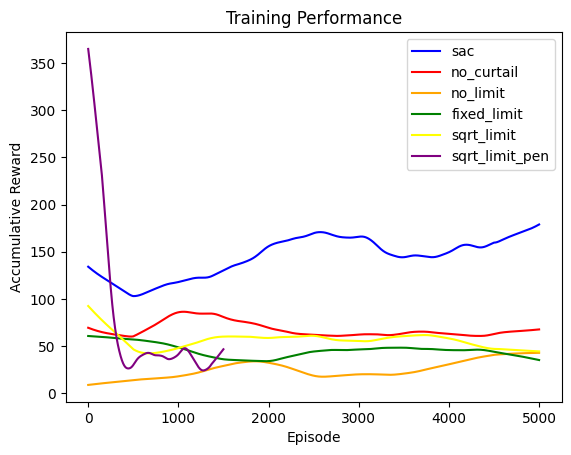

In [74]:

# Specify the path to your CSV file

for model in models:
    model.append(pd.read_csv(model[1]))
    df = model[3]
    # df = df[np.abs(stats.zscore(df['Accumulative Reward'])) < 3]
    df['Accumulative Reward (Avg)'] = df['Accumulative Reward'].rolling(window=window_size).mean()

    df_s = lowess(df['Accumulative Reward'], df['Episode'], frac=frac)

    df['Accumulative Reward (LOESS)'] = df_s[:, 1]

    plt.plot(df['Episode'], df['Accumulative Reward' + graph], color=model[2])
    

# Customize the plot
plt.title('Training Performance')
plt.xlabel('Episode')
plt.ylabel('Accumulative Reward')
plt.legend([model[0] for model in models])

# Show the plot
plt.show()

## Survival Rate

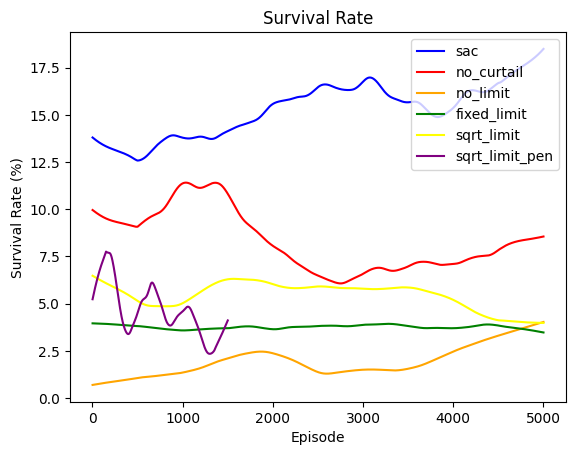

In [ ]:

for model in models:
    df = model[3]
    df['Survival Rate'] = df['Length'] / 2016 * 100
    df['Survival Rate (Avg)'] = df['Survival Rate'].rolling(window=window_size).mean()

    df_s = lowess(df['Survival Rate'], df['Episode'], frac=frac)

    df['Survival Rate (LOESS)'] = df_s[:, 1]

    plt.plot(df['Episode'], df['Survival Rate' + graph], color=model[2])
    

# Customize the plot
plt.title('Survival Rate')
plt.xlabel('Episode')
plt.ylabel('Survival Rate (%)')
plt.legend([model[0] for model in models])

# Show the plot
plt.show()

## Daily Operating Cost

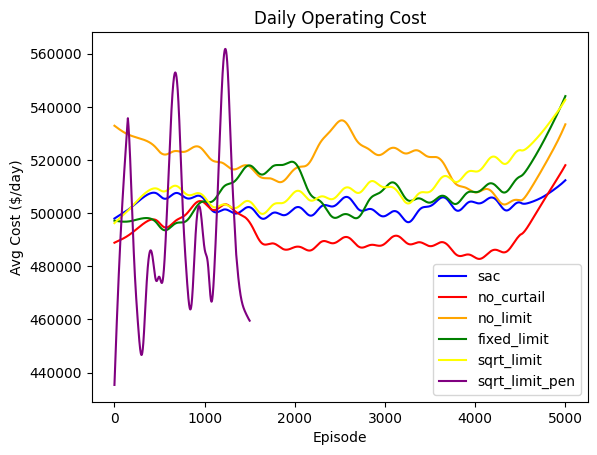

In [ ]:
for model in models:
    df = model[3]
    df['Avg Cost (Avg)'] = df['Avg Cost'].rolling(window=window_size).mean()

    df_s = lowess(df['Avg Cost'], df['Episode'], frac=frac)

    df['Avg Cost (LOESS)'] = df_s[:, 1]

    plt.plot(df['Episode'], df['Avg Cost' + graph], color=model[2])

# Customize the plot
plt.title('Daily Operating Cost')
plt.xlabel('Episode')
plt.ylabel('Avg Cost ($/day)')
plt.legend([model[0] for model in models])

# Show the plot
plt.show()

## Average Wasted Renewable Energy

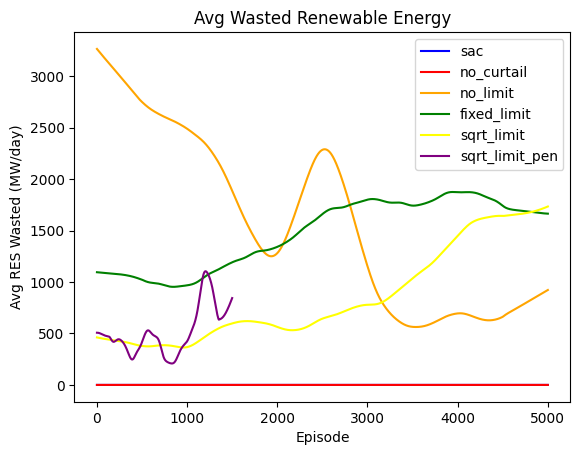

In [ ]:
for model in models:
    df = model[3]
    df['Avg Renewables Wasted (Avg)'] = df['Avg Renewables Wasted'].rolling(window=window_size).mean()

    df_s = lowess(df['Avg Renewables Wasted'], df['Episode'], frac=frac)

    df['Avg Renewables Wasted (LOESS)'] = df_s[:, 1]

    plt.plot(df['Episode'], df['Avg Renewables Wasted' + graph], color=model[2])


# Customize the plot
plt.title('Avg Wasted Renewable Energy')
plt.xlabel('Episode')
plt.ylabel('Avg RES Wasted (MW/day)')
plt.legend([model[0] for model in models])

# Show the plot
plt.show()